In [53]:
pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import FinanceDataReader as fdr

<Axes: xlabel='Date'>

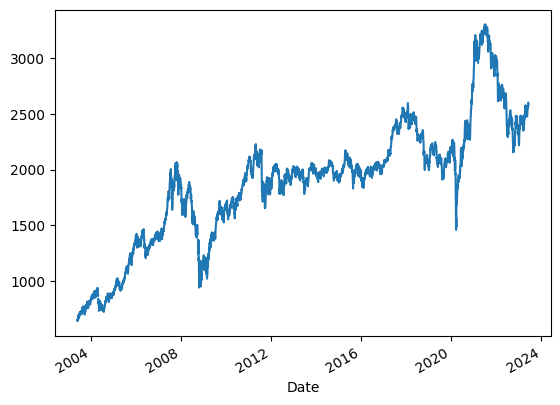

In [55]:
df = fdr.DataReader('KS11','2003-06-01', '2023-06-02')
df['Close'].plot()

In [56]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-06-02,643.929993,649.690002,642.609985,648.710022,648.710022,515000.0
2003-06-03,641.739990,643.690002,633.559998,636.940002,636.940002,494600.0
2003-06-04,642.349976,642.789978,632.469971,640.270020,640.270020,442200.0
2003-06-05,647.719971,648.349976,641.580017,642.380005,642.380005,521600.0
2003-06-06,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
wti = fdr.DataReader('CL', '2003-06-01', '2023-06-02')
wti.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-06-02,29.924999,30.070000,29.709999,29.745001,18.838997,3188800
2003-06-03,29.750000,29.905001,29.639999,29.764999,18.851658,2244800
2003-06-04,29.770000,29.945000,29.549999,29.650000,18.778822,3446800
2003-06-05,29.600000,29.764999,29.379999,29.540001,18.709156,3605600
2003-06-06,29.549999,29.674999,29.209999,29.299999,18.557148,3837400


In [58]:
sp500 = fdr.DataReader('US500', '2003-06-01', '2023-06-02')
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-06-02,963.590027,979.109985,963.590027,967.000000,967.000000,1662500000
2003-06-03,967.000000,973.020020,964.469971,971.559998,971.559998,1450200000
2003-06-04,971.559998,987.849976,970.719971,986.239990,986.239990,1618700000
2003-06-05,986.239990,990.140015,978.130005,990.140015,990.140015,1693100000
2003-06-06,990.140015,1007.690002,986.010010,987.760010,987.760010,1837200000


In [59]:
df_1 = df.merge(wti['Adj Close'], on='Date', how='left')
df_1 = df_1.rename(columns={'Adj Close_y': 'WTI유'})
df_2 = df_1.merge(sp500['Adj Close'], on='Date', how='left')
df_2 = df_2.rename(columns={'Adj Close': 'SP500지수'})

In [60]:
df_2.isnull().sum() # 코스피지수 결측치 89개, WTI유 156개, SP500지수 156개

Open            45
High            45
Low             45
Close           45
Adj Close_x     45
Volume          45
WTI유           156
SP500지수        156
dtype: int64

In [61]:
df_2

,Open,High,Low,Close,Adj Close_x,Volume,WTI유,SP500지수
Date,,,,,,,,
2003-06-02,643.929993,649.690002,642.609985,648.710022,648.710022,515000.0,18.838997,967.000000
2003-06-03,641.739990,643.690002,633.559998,636.940002,636.940002,494600.0,18.851658,971.559998
2003-06-04,642.349976,642.789978,632.469971,640.270020,640.270020,442200.0,18.778822,986.239990
2003-06-05,647.719971,648.349976,641.580017,642.380005,642.380005,521600.0,18.709156,990.140015
2003-06-06,NaN,NaN,NaN,NaN,NaN,NaN,18.557148,987.760010
...,...,...,...,...,...,...,...,...
2023-05-26,2561.939941,2567.500000,2553.790039,2558.810059,2558.810059,631800.0,76.209999,4205.450195
2023-05-30,2582.409912,2586.219971,2574.820068,2585.520020,2585.520020,638500.0,74.949997,4205.520020
2023-05-31,2586.030029,2596.310059,2575.979980,2577.120117,2577.120117,683900.0,74.379997,4179.830078


In [68]:
df_2.to_csv("wti_sp500.csv", encoding='euc-kr')

In [67]:
import pandas as pd
eco = pd.read_csv("/content/drive/MyDrive/ubion_finance/Dataset/월별.csv",index_col=0)
eco.T

통계표,3.5. 외환보유액,8.6.2. 경제활동인구,8.1.4. 전산업생산지수(농림어업제외),4.2.1. 소비자물가지수
항목명1,외환,실업률,전산업생산지수(농림어업 제외),총지수
항목명2,NaN,원계열,원계열,NaN
단위,천달러,%,2020=100,2020=100
가중치,NaN,NaN,NaN,1000.0
변환,원자료,원자료,원자료,원자료
...,...,...,...,...
2023/01,"405,587,805",3.6,103,110.1
2023/02,"401,243,805",3.1,102.5,110.38
2023/03,"401,730,032",2.9,114.9,110.56
2023/04,"402,190,255",2.8,108.6,110.8


In [64]:
eco.T.tail()

,0,1,2,3
2023/01,"405,587,805",3.6,103,110.1
2023/02,"401,243,805",3.1,102.5,110.38
2023/03,"401,730,032",2.9,114.9,110.56
2023/04,"402,190,255",2.8,108.6,110.8
2023/05,"396,787,900",NaN,NaN,111.13
